<a href="https://colab.research.google.com/github/Rstam59/TaskDataRepoForStudents/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hmavrodiev/london-bike-sharing-dataset")

print("Path to dataset files:", path)

100%|██████████| 165k/165k [00:00<00:00, 45.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hmavrodiev/london-bike-sharing-dataset/versions/1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(path + "/london_merged.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


<Axes: xlabel='is_weekend'>

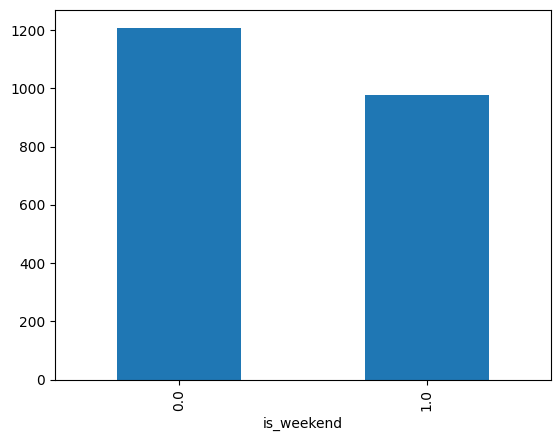

In [ ]:
df.groupby('is_weekend')['cnt'].mean().plot(kind = 'bar');

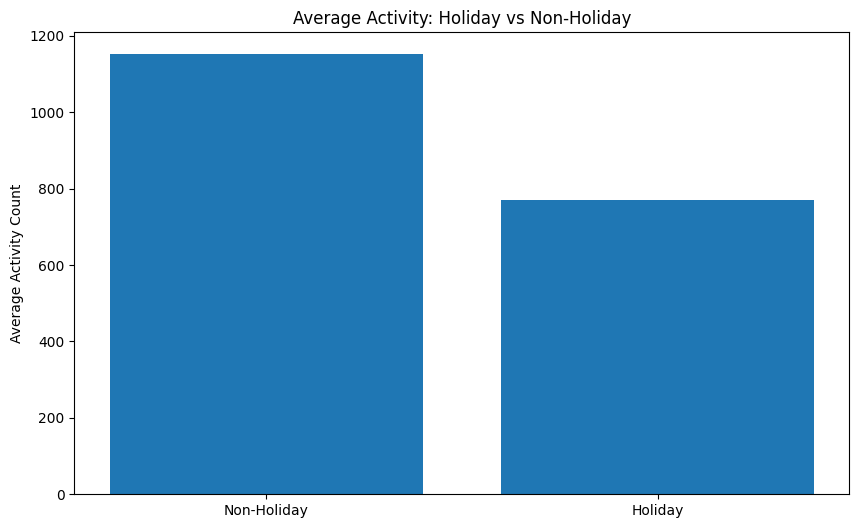

In [ ]:
plt.figure(figsize = (10, 6))
holiday_activity = df.groupby(['is_holiday'])['cnt'].mean()

plt.bar(['Non-Holiday', 'Holiday'], holiday_activity.values)
plt.title('Average Activity: Holiday vs Non-Holiday')
plt.ylabel('Average Activity Count')
plt.show()

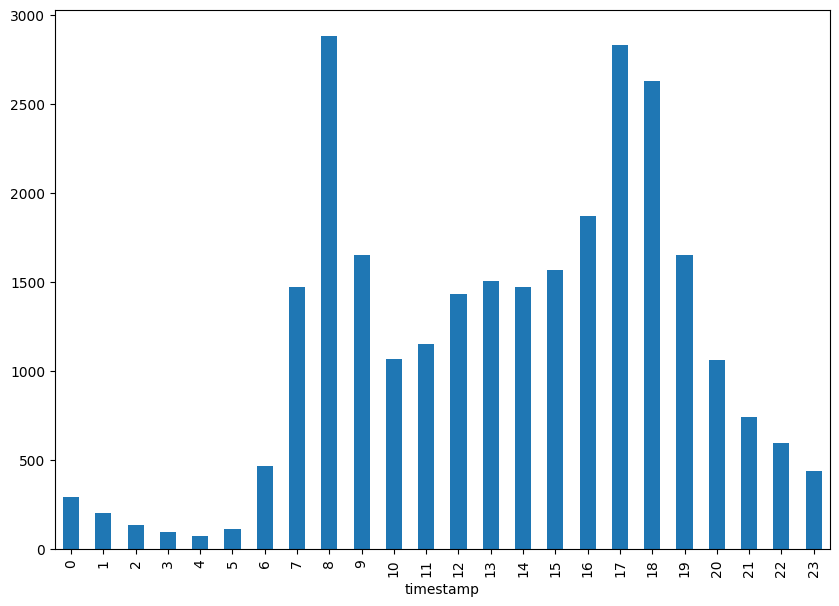

In [ ]:
plt.figure(figsize = (10, 7))
df.groupby(df['timestamp'].dt.hour)['cnt'].mean().plot();

In [ ]:
df['weather_code'].value_counts()

,count
weather_code,
1.0,6150
2.0,4034
3.0,3551
7.0,2141
4.0,1464
26.0,60
10.0,14


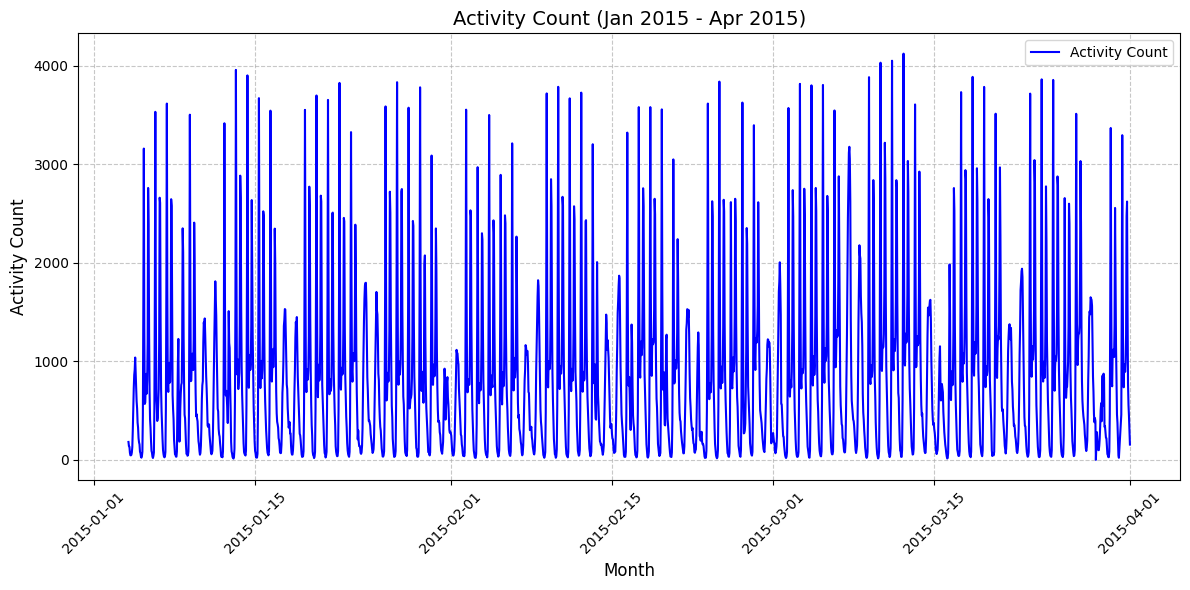

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'timestamp' is a datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter data for the desired range
filtered_df = df[(df['timestamp'] >= '2015-01-01') & (df['timestamp'] <= '2015-04-01')]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['timestamp'], filtered_df['cnt'], label='Activity Count', color='blue')

# Improve x-axis to show months
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
# plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# Add labels and title
plt.title('Activity Count (Jan 2015 - Apr 2015)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Activity Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


<Axes: >

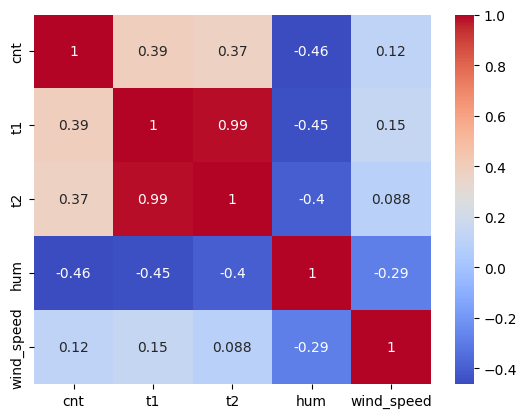

In [ ]:
import seaborn as sns
v = df[['cnt',	't1','t2','hum', 'wind_speed']].corr()
sns.heatmap(v, annot = True, cmap = 'coolwarm')

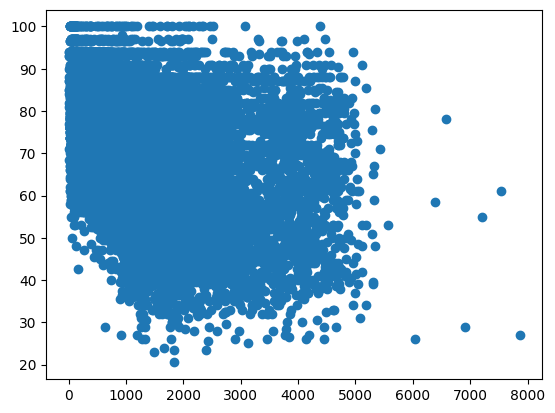

In [ ]:
plt.scatter(df['cnt'], df['hum'])

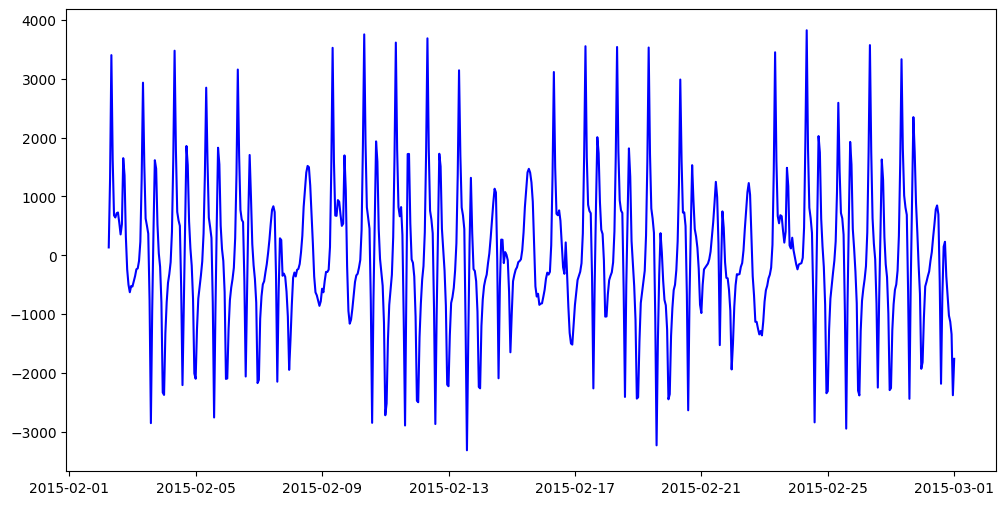

In [ ]:
# Ensure 'timestamp' is a datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter data for the desired range
filtered_df = df[(df['timestamp'] >= '2015-02-01') & (df['timestamp'] <= '2015-03-01')]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['timestamp'], filtered_df['cnt'].diff(30), label='Activity Count', color='blue')


In [ ]:
filtered_df['timestamp'].dt.day_of_week

,timestamp
671,6
672,6
673,6
674,6
675,6
...,...
811,4
812,4
813,4
814,4


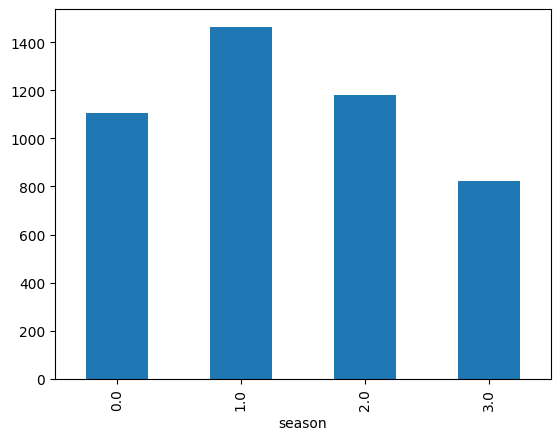

In [ ]:
df.groupby('season')['cnt'].mean().plot(kind = 'bar');

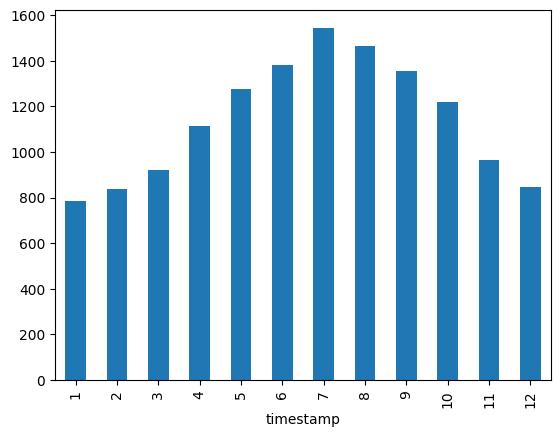

In [ ]:
df.groupby(df['timestamp'].dt.month)['cnt'].mean().plot(kind = 'bar');

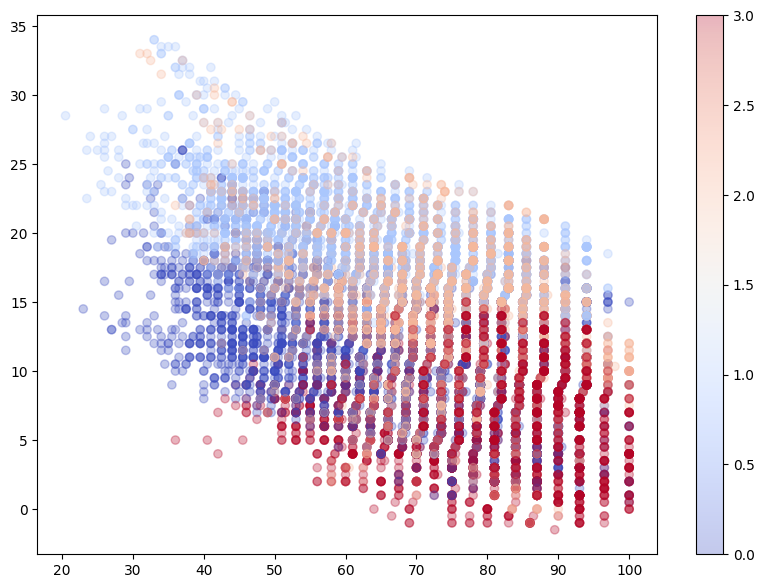

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(df['hum'], df['t1'], c = df['season'], cmap ='coolwarm', alpha = 0.3)
plt.colorbar()

In [ ]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season', 'day_type'],
      dtype='object')

In [ ]:
pd.read_json("/content/data.json")

ValueError: Unmatched ''"' when when decoding 'string'

In [ ]:
import json

with open("/content/data.json", 'r') as f:
    try:
        data = json.load(f)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        print(f"Line: {e.lineno}, Column: {e.colno}")

In [ ]:
df = pd.read_json("/content/data.json")
df

,query,datetime,platform
0,english student's book,2024-02-08 14:19:38,touch
1,DEEPCOOL FC120-3 in 1,2024-02-08 19:26:09,desktop
2,english listening test,2024-02-09 09:01:44,desktop
3,c2h2-x-c2h5oh c12,2024-02-08 17:22:09,touch
4,epic games,2024-02-09 21:55:35,touch
...,...,...,...
694427,a+1/6 7/12,2024-02-08 13:09:54,touch
694428,carello.bravo 8512,2024-02-08 16:13:11,touch
694429,Windows 7,2024-02-09 16:27:37,touch
694430,amber moore,2024-02-08 23:39:53,touch


In [ ]:
df['query'].value_counts().iloc[:10]

,count
query,
youtube,4707
mail.ru,3109
xvideos,2945
whatsapp web,2449
pornhub,1914
mail,1701
xxx,1617
google,1566
gmail,1470


<Axes: xlabel='datetime'>

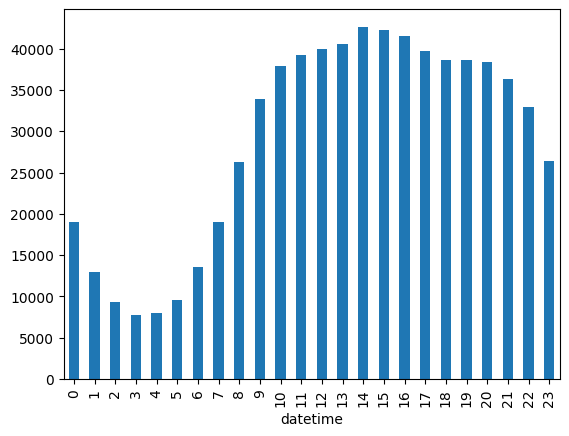

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.groupby(df['datetime'].dt.hour)['query'].count().plot(kind = 'bar')

In [ ]:

# Group by platform
grouped = df.groupby('platform')['query'].count().reset_index()

# Rename columns for better readability
grouped.columns = ['Platform', 'Query Count']

# Display the result
print(grouped)

  Platform  Query Count
0  desktop       368511
1    touch       325921


In [ ]:
queries_by_platform = df.groupby('platform')['query'].apply(list).reset_index()

# Rename columns for better readability
queries_by_platform.columns = ['Platform', 'Queries']

# Display the grouped data
print(queries_by_platform)

  Platform                                            Queries
0  desktop  [DEEPCOOL FC120-3 in 1, english listening test...
1    touch  [english student's book, c2h2-x-c2h5oh c12, ep...
